<a href="https://colab.research.google.com/github/Faizanshah007/MindCanvas/blob/master/pca_used_final_faizan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kmeans

In [0]:
import pandas as pd 
  
zoo_data = pd.read_csv("https://raw.githubusercontent.com/Faizanshah007/MindCanvas/master/Result.csv") 
zoo1=zoo_data
zoo1=zoo1.drop(['sc'], axis=1)

# print first 5 rows of zoo data  
print(zoo_data.head())
print(zoo1.head())

      e       mouse  c1  c2   c3  sc
0 -1.56 -123.516907   0   0 -0.0   0
1 -1.59 -155.785170   1  -1 -0.0   0
2 -0.98  -25.626562   0  -1 -0.0   9
3  4.89 -186.324637   0   0 -0.0   9
4 -4.92  -96.613240   1   0 -0.0   0
      e       mouse  c1  c2   c3
0 -1.56 -123.516907   0   0 -0.0
1 -1.59 -155.785170   1  -1 -0.0
2 -0.98  -25.626562   0  -1 -0.0
3  4.89 -186.324637   0   0 -0.0
4 -4.92  -96.613240   1   0 -0.0


In [0]:
print(zoo_data.tail())
zoo2=zoo1.drop(['mouse'], axis=1)
zoo2=zoo2.drop(['e'], axis=1)
print(zoo2.tail())

        e       mouse  c1  c2   c3  sc
215  1.10  -22.063214   3  -1 -0.0  47
216  4.78    5.572641   1   0 -0.0  18
217  1.23  -18.696162   2   0 -0.0  18
218  3.98 -121.641343   6   0 -0.0  29
219  5.00 -188.386852   3  -1 -0.5  29
     c1  c2   c3
215   3  -1 -0.0
216   1   0 -0.0
217   2   0 -0.0
218   6   0 -0.0
219   3  -1 -0.5


In [0]:
from sklearn.decomposition import PCA 

pca = PCA(1) 
pca.fit(zoo2) 
  
pca_data = pd.DataFrame(pca.transform(zoo2)) 
  
print(pca_data.tail())

            0
215 -0.074843
216 -2.118951
217 -1.120353
218  2.874040
219 -0.062588


In [0]:
zoo3=zoo1.drop(['c1','c2','c3'], axis=1)
zoo3['c']=pca_data
zoo3.head()

,e,mouse,c
0,-1.56,-123.516907,-3.117549
1,-1.59,-155.785170,-2.072040
2,-0.98,-25.626562,-3.070638
3,4.89,-186.324637,-3.117549
4,-4.92,-96.613240,-2.118951


In [0]:
from sklearn.cluster import KMeans 
clusters = 11
  
kmeans = KMeans(n_clusters = clusters) 
kmeans.fit(zoo3) 
  
print(kmeans.labels_)

[ 1 10  8 10  5  2  6  9  8 10  6  9  0  2  9  2  5  2  2  5  2  6  0  5
  8  9  0  9  9  8  7  7  0  9  0  2  1  1 10 10  5  5  1  1  9  1 10  8
  8  5  2  5  1  0  2  8  2  0  1  5  2  2  6  0 10  9  5  5  2  2  8  2
  1  0  8  2  8  0  5  2  2  4  1  8  0  3  8  8  9  5  1  2  1  6  2  5
  1 10 10  5  5  2  9  0  6  0  8  0  0  0  3  3  1  9  0  2  8  5  8  9
  3  9  8  5  2  0  3  6  3  8  5  8  8  1  1  5  8  9  5  5  8  2  5  8
  2  3  4 10  5  2 10  2  5  9  1  2  0  2  5  1  8  0  7  9  8  4  0  8
  5  1  2  9  8  5  1 10  1  3  2 10  1  2  2  0  5  6 10  4  0  2  1  2
  1  1  4  2  4  1  8  6  5 10  6  8  5  2  4  1  2  3  9  5  0  2  2  8
  0  8  1 10]


In [0]:
zoo_data['cluster']= kmeans.labels_
zoo_data1=zoo_data.drop(['c1','c2','c3'], axis=1)
zoo_data1['c']=pca_data

In [0]:
zoo_data1.describe

<bound method NDFrame.describe of         e       mouse  sc  cluster         c
0   -1.56 -123.516907   0        1 -3.117549
1   -1.59 -155.785170   0       10 -2.072040
2   -0.98  -25.626562   9        8 -3.070638
3    4.89 -186.324637   9       10 -3.117549
4   -4.92  -96.613240   0        5 -2.118951
5   -4.92  -44.533302   0        2 -2.072040
6    5.00   78.433468   0        6 -1.120353
7    4.97   24.485450   0        9 -2.072040
8    2.14  -16.513054  20        8 -1.120353
9    2.47 -190.484510  20       10 -0.062588
10   1.26   67.577969  17        6 -2.118951
11   1.97   38.930253  17        9 -0.027932
12   4.89   19.167398   0        0  0.982922
13   2.22  -49.860190  47        2 -1.120353
14   2.28   37.921752  47        9  0.923755
15   5.00  -62.717834  29        2  3.884894
16   4.81  -91.361292  29        5  3.872639
17   5.00  -47.014939  72        2  5.882091
18  -1.37  -59.366848   0        2 -1.026530
19   4.97  -94.959732   0        5 -2.072040
20   4.97  -37.582226

In [0]:
X=zoo_data1.drop(['cluster','sc'],axis=1)
zoo_data1[29:190]

,e,mouse,sc,cluster,c
29,5.00,-19.683431,45,8,0.876844
30,-4.92,183.531190,0,7,-1.073441
31,-4.92,174.792943,0,7,-3.117549
32,5.00,-0.711243,36,0,0.982922
33,5.00,46.108959,36,9,1.981520
34,3.69,6.304441,0,0,0.876844
35,1.07,-66.522554,0,2,-3.070638
36,-5.00,-115.188675,29,1,0.876844
37,-2.57,-114.147875,29,1,-1.073441
38,3.69,-167.647243,12,10,-0.074843


In [0]:
sc0=zoo_data[zoo_data.cluster==0]
sc00=sc0['sc']
sc1=zoo_data[zoo_data.cluster==1]
sc11=sc1['sc']
sc2=zoo_data[zoo_data.cluster==2]
sc22=sc2['sc']
sc3=zoo_data[zoo_data.cluster==3]
sc33=sc3['sc']
sc4=zoo_data[zoo_data.cluster==4]
sc44=sc4['sc']
sc5=zoo_data[zoo_data.cluster==5]
sc55=sc5['sc']
sc6=zoo_data[zoo_data.cluster==6]
sc66=sc6['sc']
sc7=zoo_data[zoo_data.cluster==7]
sc77=sc7['sc']
sc8=zoo_data[zoo_data.cluster==8]
sc88=sc8['sc']
sc9=zoo_data[zoo_data.cluster==9]
sc99=sc9['sc']
sc10=zoo_data[zoo_data.cluster==10]
sc1010=sc10['sc']

In [0]:
print('averaged score of cluster 0:',sc00.sum()/len(sc00))
print('averaged score of cluster 1:',sc11.sum()/len(sc11))
print('averaged score of cluster 2:',sc22.sum()/len(sc22))
print('averaged score of cluster 3:',sc33.sum()/len(sc33))
print('averaged score of cluster 4:',sc44.sum()/len(sc44))
print('averaged score of cluster 5:',sc55.sum()/len(sc55))
print('averaged score of cluster 6:',sc66.sum()/len(sc66))
print('averaged score of cluster 7:',sc77.sum()/len(sc77))
print('averaged score of cluster 8:',sc88.sum()/len(sc88))
print('averaged score of cluster 9:',sc99.sum()/len(sc99))
print('averaged score of cluster 10:',sc1010.sum()/len(sc1010))


averaged score of cluster 0: 17.72
averaged score of cluster 1: 28.107142857142858
averaged score of cluster 2: 17.175
averaged score of cluster 3: 22.666666666666668
averaged score of cluster 4: 13.285714285714286
averaged score of cluster 5: 21.15625
averaged score of cluster 6: 11.3
averaged score of cluster 7: 0.0
averaged score of cluster 8: 21.806451612903224
averaged score of cluster 9: 16.157894736842106
averaged score of cluster 10: 27.9375


In [0]:
#new order(0-10): 7, 6, 4, 9, 2, 0, 8, 3, 10, 1
X.head(50)

,e,mouse,c
0,-1.56,-123.516907,-3.117549
1,-1.59,-155.785170,-2.072040
2,-0.98,-25.626562,-3.070638
3,4.89,-186.324637,-3.117549
4,-4.92,-96.613240,-2.118951
5,-4.92,-44.533302,-2.072040
6,5.00,78.433468,-1.120353
7,4.97,24.485450,-2.072040
8,2.14,-16.513054,-1.120353
9,2.47,-190.484510,-0.062588


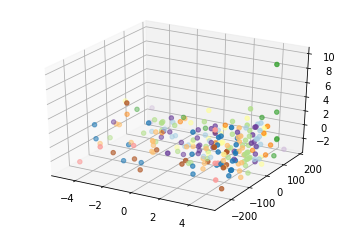

In [0]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X['e'], X['mouse'], X['c'], c = kmeans.labels_, cmap = 'Paired')

plt.show()